[13.344444444444445, 21.477777777777778, 21.466666666666665, 22.58888888888889, 17.144444444444446, 23.133333333333333, 12.9, 17.455555555555556, 17.38888888888889, 19.444444444444443, 16.866666666666667, 18.377777777777776, 12.455555555555556, 15.8, 12.688888888888888, 16.766666666666666, 18.144444444444446, 18.433333333333334, 12.644444444444444, 22.555555555555557, 19.822222222222223, 13.8, 19.08888888888889, 14.555555555555555, 17.788888888888888, 17.488888888888887, 19.466666666666665, 23.244444444444444, 16.555555555555557, 14.444444444444445, 18.466666666666665, 16.988888888888887, 17.822222222222223, 22.244444444444444, 17.488888888888887, 13.577777777777778, 19.244444444444444, 17.377777777777776, 18.055555555555557, 17.38888888888889, 14.455555555555556, 19.855555555555554, 21.977777777777778, 21.977777777777778, 18.833333333333332, 16.11111111111111, 12.644444444444444, 16.444444444444443]
48
[19.488888888888887, 17.0, 18.377777777777776, 21.9, 15.133333333333333, 22.0888888

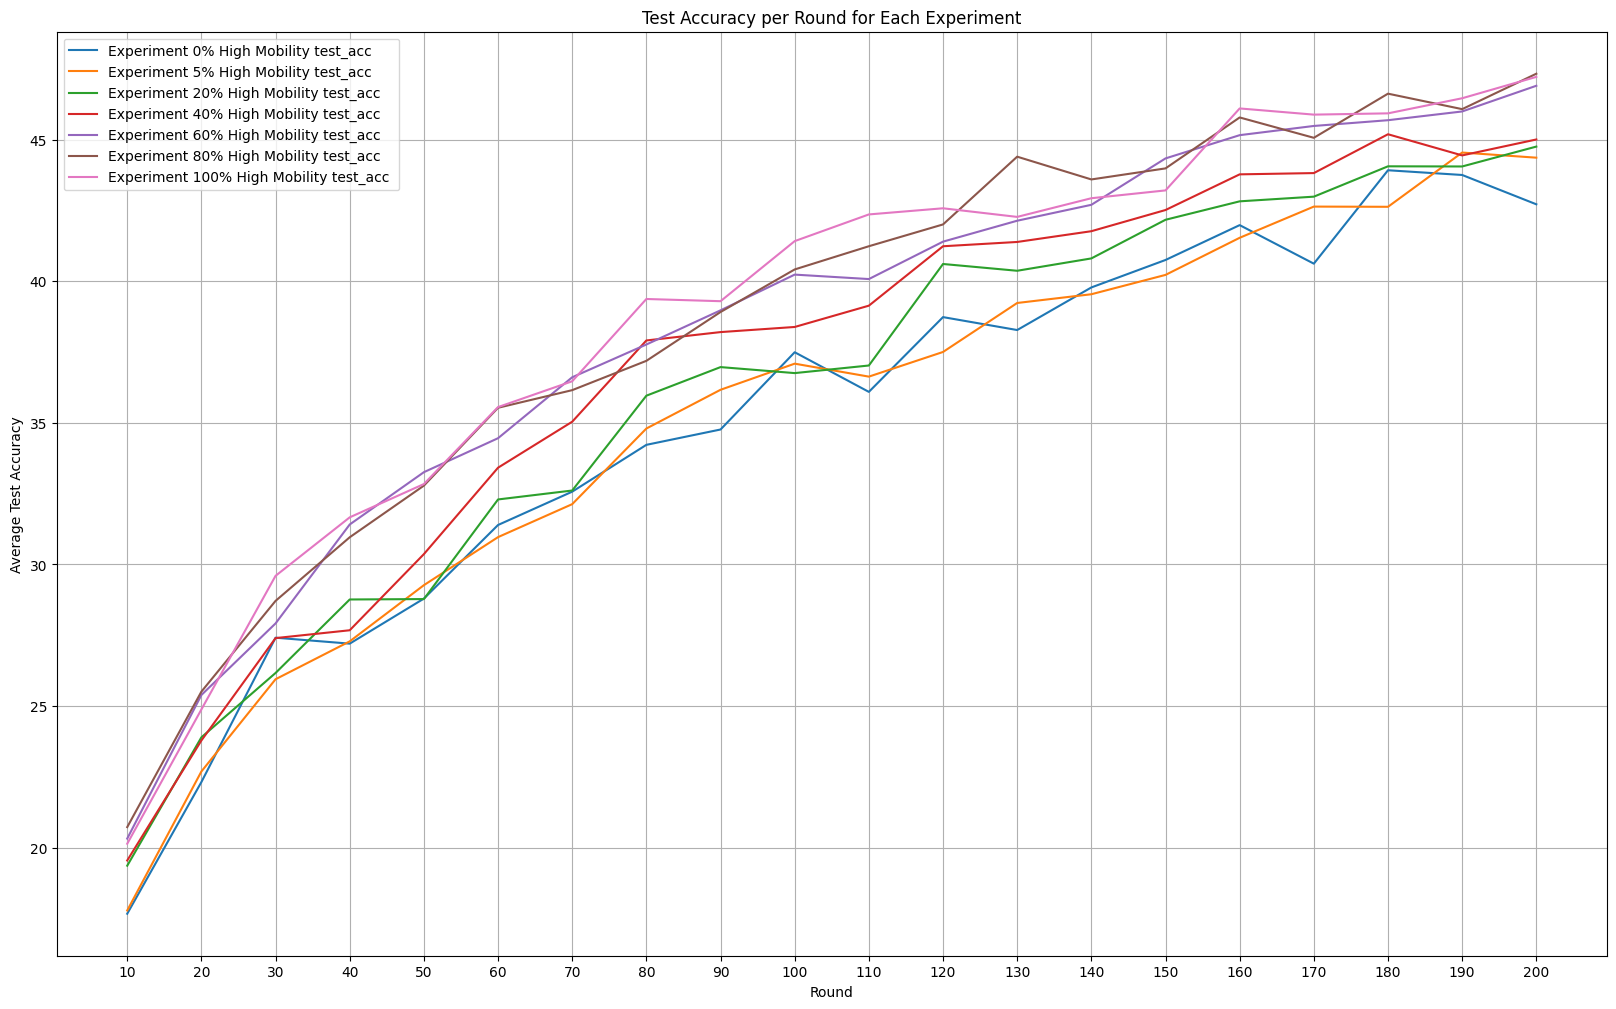

In [7]:
import os
import json
import numpy as np
import matplotlib.pyplot as plt    
from collections import defaultdict


def average_of_first_percent(lst, p):
    n = int(len(lst) * p)
    return np.mean(lst[:n])

def average_of_last_percent(lst, p):
    n = int(len(lst) * p)
    return np.mean(lst[-n:])

num_nodes = 48
# rounds_cutoff = float('inf')
rounds_cutoff = 200
experiments = {
    0.0: ".saved_experiments/2024-05-30-new-neighbours-1/2024-05-30T23:55-dynamic_48_0_0.txt/machine0",
    0.05: ".saved_experiments/2024-05-30-new-neighbours-1/2024-05-31T00:16-dynamic_48_0_05.txt/machine0",
    0.2: ".saved_experiments/2024-05-30-new-neighbours-1/2024-05-31T00:36-dynamic_48_0_2.txt/machine0",
    0.4: ".saved_experiments/2024-05-30-new-neighbours-1/2024-05-31T00:57-dynamic_48_0_4.txt/machine0",
    0.6: ".saved_experiments/2024-05-30-new-neighbours-1/2024-05-31T01:18-dynamic_48_0_6.txt/machine0",
    0.8: ".saved_experiments/2024-05-30-new-neighbours-1/2024-05-31T01:39-dynamic_48_0_8.txt/machine0",
    1.0: ".saved_experiments/2024-05-30-new-neighbours-1/2024-05-31T01:59-dynamic_48_1_0.txt/machine0",
}
experiment_names = {
    0.0: "0% High Mobility",
    0.05: "5% High Mobility",
    0.2: "20% High Mobility",
    0.4: "40% High Mobility",
    0.6: "60% High Mobility",
    0.8: "80% High Mobility",
    1.0: "100% High Mobility",
}
data = {}

for experiment, dir in experiments.items():
    data[experiment] = {}
    for i in range(num_nodes):
        file_path = os.path.join(dir, f"{i}_results.json")
        if os.path.exists(file_path):
            with open(file_path, "r") as file:
                content = json.load(file)

                for statistic, rounds in content.items():
                    if statistic not in data[experiment]:
                        data[experiment][statistic] = {}

                    for round, value in rounds.items():
                        if int(round) > rounds_cutoff:
                            continue

                        if round not in data[experiment][statistic]:
                            data[experiment][statistic][round] = []
                        data[experiment][statistic][round].append(value)


statistics = ["test_acc"]
averages = {}
high_mobility_averages = defaultdict(lambda: defaultdict(dict))
low_mobility_averages = defaultdict(lambda: defaultdict(dict))
for experiment in data:
    averages[experiment] = {}
    for statistic in statistics:
        if statistic not in averages[experiment]:
            averages[experiment][statistic] = {}

        for round, values in data[experiment][statistic].items():
            averages[experiment][statistic][round] = np.mean(values)

            if round == "10":
                print(values)
                print(len(values))

            high_mobility_proportion = experiment
            low_mobility_proportion = 1 - experiment
            high_mobility_averages[experiment][statistic][round] = average_of_first_percent(values, high_mobility_proportion)
            low_mobility_averages[experiment][statistic][round] = average_of_last_percent(values, low_mobility_proportion)

plt.figure(figsize=(20, 12))
def plot_averages(experiment_names, averages, extra_info=""):
    for experiment, statistics_dict in averages.items():
        for statistic in statistics:
            rounds, acc_values = zip(*averages[experiment][statistic].items())
            plt.plot(rounds, acc_values, label=f"Experiment {experiment_names[experiment]} {statistic} {extra_info}")

plot_averages(experiment_names, averages)

plt.xlabel("Round")
plt.ylabel("Average Test Accuracy")
plt.title("Test Accuracy per Round for Each Experiment")
plt.legend()
plt.grid(True)
plt.show()


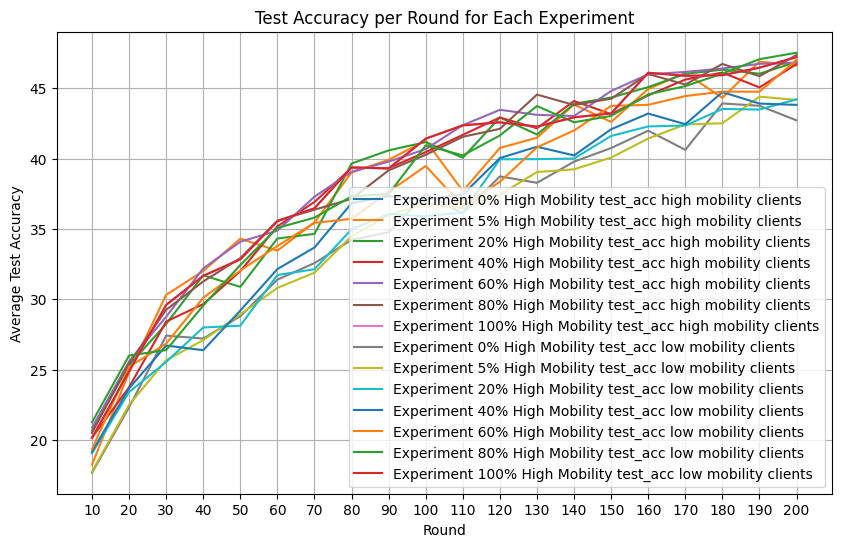

In [8]:
plt.figure(figsize=(10, 6))

plot_averages(experiment_names, high_mobility_averages, 'high mobility clients')
plot_averages(experiment_names, low_mobility_averages, 'low mobility clients')

plt.xlabel("Round")
plt.ylabel("Average Test Accuracy")
plt.title("Test Accuracy per Round for Each Experiment")
plt.legend()
plt.grid(True)
plt.show()
